# Project 5

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import glob
import os

from tensorflow import keras
import matplotlib.pyplot as plt



## size 바꾸기

### 가위

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(112,112)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rockpaperscissor/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!


### 바위

In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rockpaperscissor/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")




500  images to be resized.
500  images resized.
바위 이미지 resize 완료!


### 보

In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rockpaperscissor/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")



500  images to be resized.
500  images resized.
보 이미지 resize 완료!


In [6]:
def load_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rockpaperscissor"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1500 입니다.
x_train shape: (1500, 112, 112, 3)
y_train shape: (1500,)


### 이미지 그리기

라벨:  0


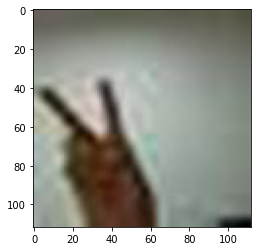

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 딥러닝 네트워크 설계

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                692256    
_________________________________________________________________
dense_3 (Dense)              (

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
47/47 [==============================] - 1s 8ms/step - loss: 0.1189 - accuracy: 0.9707
Epoch 2/30
47/47 [==============================] - 0s 7ms/step - loss: 0.0202 - accuracy: 0.9987
Epoch 3/30
47/47 [==============================] - 0s 7ms/step - loss: 0.0151 - accuracy: 0.9987
Epoch 4/30
47/47 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 5/30
47/47 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 6/30
47/47 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 7/30
47/47 [==============================] - 0s 7ms/step - loss: 7.5048e-04 - accuracy: 1.0000
Epoch 8/30
47/47 [==============================] - 0s 6ms/step - loss: 4.9245e-04 - accuracy: 1.0000
Epoch 9/30
47/47 [==============================] - 0s 7ms/step - loss: 2.6820e-04 - accuracy: 1.0000
Epoch 10/30
47/47 [==============================] - 0s 7ms/step - loss: 1.7323e-04 - accuracy: 1.0000
Epo

## 테스트

In [19]:
# test set

test_image_dir_path = os.getenv("HOME") + "/aiffel/rockpaperscissor/test/scissor"
resize_images(test_image_dir_path)

print("가위 이미지 resize 완료!")


test_image_dir_path = os.getenv("HOME") + "/aiffel/rockpaperscissor/test/rock"
resize_images(test_image_dir_path)

print("바위 이미지 resize 완료!")



test_image_dir_path = os.getenv("HOME") + "/aiffel/rockpaperscissor/test/paper"
resize_images(test_image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [20]:
image_dir_path = os.getenv("HOME") + "/aiffel/rockpaperscissor/test"
(x_test,y_test) = load_data(image_dir_path)


학습데이터(x_train)의 이미지 개수는 300 입니다.


In [21]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

47/47 - 0s - loss: 1.9381 - accuracy: 0.9133
test_loss : 1.9381401538848877
test_accuracy : 0.9133333563804626
